### NN by Hand

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
X,y = make_regression(n_features=2,
                      n_informative=1,
                      noise = 100,
                      random_state = 42
                     )

### Let's first check to see how a vanilla linear regression model does:

In [4]:
LinearRegression().fit(X,y).score(X,y)

0.4144461358278726

### Input Neurons
We have just two features, so we'll have two input neurons

In [5]:
n_sample = X.shape[0]
n_features = X.shape[1]

#Initial inputs
input1 = X[:,0].reshape(-1,1)
input2 = X[:,1].reshape(-1,1)

### Weights for the Connections between the input Neurons and the Hidden Neurons
We'll just start by setting our weights randomly. The idea wull be that we'll be able to use gradient descent to improve their values during network training

In [6]:
# Four weights to optimize for between input and  hidden layers
#for simplicity let's assume biases of 0 throughout

np.random.seed(42)

in_hid_weights1 = np.random.rand(2)
in_hid_weights2 = np.random.rand(2)

In [7]:
in_hid_weights1

array([0.37454012, 0.95071431])

In [8]:
in_hid_weights2

array([0.73199394, 0.59865848])

### Hidden Neurons
Each neuron in the hidden layer will take two inputs and multiply them by a unique set of weights:


In [9]:
in1_to_hid = (np.sum(np.product([in_hid_weights1,X],axis=0),
                    axis=1)).reshape(-1,1)
in2_to_hid = (np.sum(np.product([in_hid_weights2,X],axis=0),
                    axis=1)).reshape(-1,1)

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


For simplicity let's assume a **linear activation function,**

f(x) = x, in the hidden nodes

### Weights for the connections between the hidden neurons and the ouput neurons
Again we'll just set our weights randomly. Here there will be two weights: one governing the connection between each hidden neuron and the output neuron

In [10]:
np.random.seed(43)
hid_out_weights = np.random.rand(2)

In [11]:
hid_out_weights

array([0.11505457, 0.60906654])

### Output Neuron
Noe we need to take the contribution from each hidden neuron and create a linear sum with the predetermined weights, just as above in the hidden neurons

In [14]:
joint_to_out = np.hstack((in1_to_hid,in2_to_hid))

In [16]:
output = (np.sum(np.product([hid_out_weights,joint_to_out],axis=0),
               axis=1)).reshape(-1,1)

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Error calculation
Now we can compute a measure of error:

In [17]:
output = output.flatten()
np.sqrt(mse(y,output))

132.15409393186755

### Backpropagation
How do we make corrections to our weights to improve our model's perfomance
our network looks like this
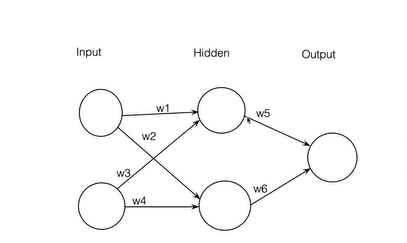